In [2]:
# Replotting PanViTa output 

#---------------- CARD database 

antibiotic_pangenome <- read.table("data/card_drug_classes.tsv", header = TRUE, sep = "\t") # I manually modified a few things to make the plot better looking
mechanism_antibiotic_pangenome <- read.table("data/card_mechanisms.tsv", header = TRUE, sep = "\t") 

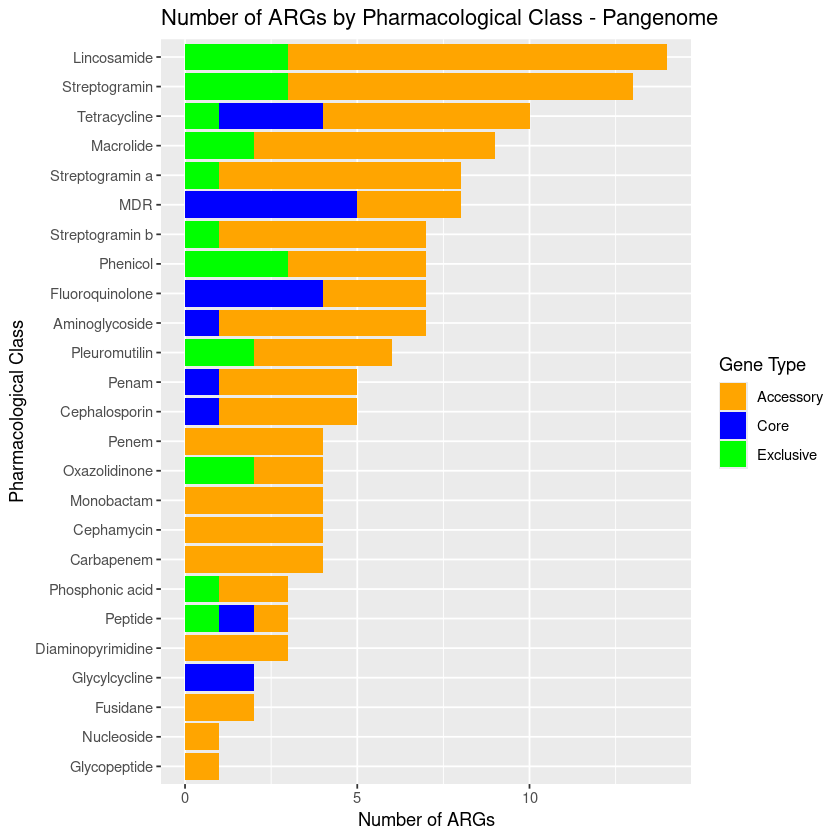

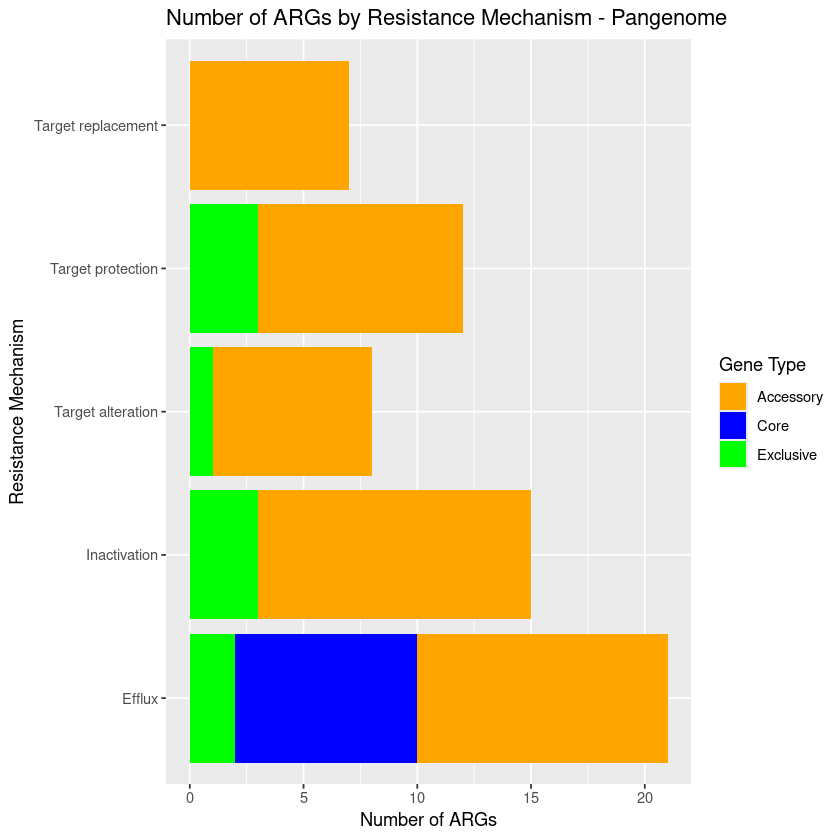

In [3]:
## Reshape the data frame into long format
library(tidyr)
library(ggplot2)

antibiotic_pangenome_long <- pivot_longer(antibiotic_pangenome, cols = c(Core, Accessory, Exclusive),
                                     names_to = "Gene_Type", values_to = "Count")
## Define colors
gene_colors <- c(Core = "blue", Accessory = "orange", Exclusive = "green")

## Plot 
ggplot(antibiotic_pangenome_long, aes(x = reorder (Pharmacological.Class, Count), y = Count, fill = Gene_Type)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Number of ARGs by Pharmacological Class - Pangenome",
       x = "Pharmacological Class", y = "Number of ARGs", fill = "Gene Type") +
  scale_fill_manual(values = gene_colors) +
  coord_flip()  # Flip coordinates to have vertical bars

## Repeat the same for the mechanisms of resistance plot 
library(tidyr)
mechanism_pangenome_long <- pivot_longer(mechanism_antibiotic_pangenome, cols = c(Core, Accessory, Exclusive),
                                     names_to = "Gene_Type", values_to = "Count")
gene_colors <- c(Core = "blue", Accessory = "orange", Exclusive = "green")
ggplot(mechanism_pangenome_long, aes(x = Resistance.Mechanism, y = Count, fill = Gene_Type)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Number of ARGs by Resistance Mechanism - Pangenome",
       x = "Resistance Mechanism", y = "Number of ARGs", fill = "Gene Type") +
  scale_fill_manual(values = gene_colors) +
  coord_flip()  
  